In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import japanize_matplotlib
import matplotlib.ticker as ptick
from matplotlib.pyplot import figure

In [2]:
#csvファイルを読み込む
#usecols：使う列の指定　skiprows：行のスキップ  names：取り出す列の名前付け
file1 = pd.read_csv("2020_09_29_20_20.csv", usecols=[0,1], skiprows=2, names=["m/Q", "電流値"], encoding="utf8")
file2 = pd.read_csv("2020_09_29_19_27.csv", usecols=[0,1], skiprows=2, names=["m/Q", "電流値"], encoding="utf8")

,H+,H2+ C6+ N7+ O8+,B5+,O7+,N6+,C5+,O6+,B4+,N5+,C4+,O5+,10B3+,N4+,B3+,C3+ O4+,N3+,10B2+,O3+,B2+,C2+,N2+,O2+
m/Q,1.00,2.00,2.20,2.28,2.33,2.40,2.66,2.75,2.80,3.00,3.20,3.33,3.50,3.66,4.00,4.66,5.00,5.33,5.50,6.00,7.00,8.00
電流値,2.60,3.68,3.86,3.93,3.97,4.03,4.24,4.31,4.35,4.50,4.65,4.74,4.86,4.97,5.20,5.61,5.81,6.00,6.10,6.37,6.88,7.35


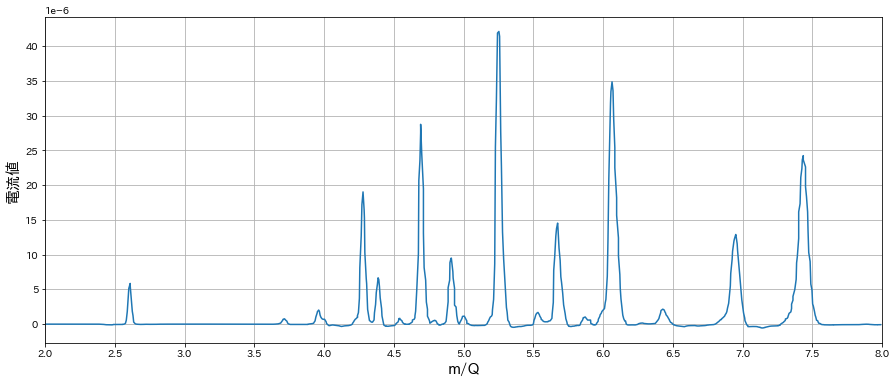

In [3]:
#グラフの作成
figure(num=None, figsize=(15, 6))#グラフのサイズ
#軸のメモリ幅
plt.xticks(np.arange(2, 8+1, 0.5))
plt.yticks(np.arange(-5e-6, 5e-4, 5e-6))
#軸ラベル
plt.xlabel('m/Q', fontsize=15)
plt.ylabel('電流値', fontsize=15)
plt.xlim([2,8])#x軸の範囲
plt.grid(True)
plt.plot(file1["m/Q"], file1["電流値"])
ax = plt.gca()#axesの取得
ax.ticklabel_format(style="sci",  axis="y",scilimits=(-6,-6))#y軸指数表記

#表の作成
Hcurr=2.6 #He＋の電流値
ion_name=['H+','H2+ C6+ N7+ O8+','B5+','O7+','N6+','C5+','O6+','B4+','N5+'
          ,'C4+','O5+','10B3+','N4+','B3+','C3+ O4+','N3+','10B2+','O3+','B2+','C2+','N2+','O2+']
ion_mass=[1,2,2.2,2.28,2.33,2.4,2.66,2.75,2.8,3,3.2,3.33,3.5,3.66,4,4.66,5,5.33,5.5,6,7,8]
ion_curr=[math.sqrt(i)*Hcurr for i in ion_mass]

#原子質量と電流値を小数点2桁に変更
for j in range(len(ion_mass)):
    ion_mass[j]="{:.2f}".format(ion_mass[j])
for j in range(len(ion_curr)):
    ion_curr[j]="{:.2f}".format(ion_curr[j])

'''debug
a=len(ion_name)
b=len(ion_mass)
print(a,b)
'''

list = [
    ion_mass, 
    ion_curr
]

custom_style = [
    {
        'selector': 'th', #表のヘッダーのスタイルを変更
        'props':[
            ('border', 'solid black 1px'), #ボーダーを実線、黒色、太さ1pxに設定
            ('text-align', 'center'), #中央揃え
        ]
    },
    {
        'selector': 'td', #各セルのスタイルを変更
        'props':[
            ('border', 'solid black 1px'), #ボーダーを実線、黒色、太さ1pxに設定
            ('text-align', 'center'), #中央揃え
        ]
    }
]
df = pd.DataFrame(list)
df.index = ['m/Q','電流値']#列要素の設定
df.columns =ion_name#行要素の設定
df.style.set_table_styles(custom_style)

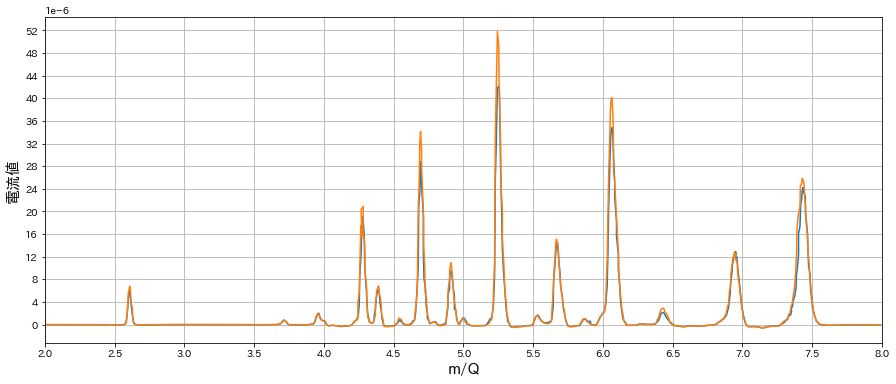

In [4]:
#グラフ重ねて表示
figure(num=None, figsize=(15, 6))#グラフのサイズ
#軸のメモリ幅
plt.xticks(np.arange(2, 8+1, 0.5))
plt.yticks(np.arange(-4e-6, 4e-4, 4e-6))
#軸ラベル
plt.xlabel('m/Q', fontsize=15)
plt.ylabel('電流値', fontsize=15)
plt.xlim([2,8])#x軸の範囲
plt.grid(True)
plt.plot(file1["m/Q"], file1["電流値"])
ax = plt.gca()#axesの取得
ax.ticklabel_format(style="sci",  axis="y",scilimits=(-6,-6))#y軸指数表記
plt.plot(file2["m/Q"], file2["電流値"])